In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
from matplotlib.pyplot import rcParams
from statsmodels.stats.weightstats import _zconfint_generic
from scipy.stats import norm

# Практика

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ве https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# косинусное распределение

cosine_rv = sts.cosine()
sample = cosine_rv.rvs(1000)
sample

array([-1.11398495e+00, -1.55361957e+00,  7.77797093e-02,  2.60082499e+00,
       -3.39481624e-01,  7.23729540e-01,  2.02095699e+00, -1.08488380e+00,
       -6.67157419e-01, -1.53346978e+00, -2.42621693e+00,  1.13522025e+00,
        1.06274274e+00,  7.18488215e-01,  1.49778695e-01,  7.44670144e-01,
        1.13455200e+00,  6.37515307e-02,  1.16057531e+00,  1.37847668e+00,
        4.44771515e-01, -2.45999869e-01,  3.67299637e-01, -8.05212169e-01,
       -5.74662276e-01, -1.57910551e+00, -9.47476599e-01,  3.46244611e-02,
       -3.29898843e-01, -7.64986470e-01, -5.67869625e-01,  3.84870888e-01,
        7.89791823e-01,  2.57314258e-01, -1.51268879e+00, -3.31554912e-01,
        8.91782768e-01,  2.97747308e-01, -1.26840883e+00, -1.14704643e+00,
       -7.46071046e-01, -6.04453068e-01,  5.91556726e-01, -8.31433969e-01,
        1.30879508e+00,  3.32335880e-01,  2.33410826e-01,  6.91551944e-01,
        1.16520936e+00, -7.59929165e-01,  2.23533514e+00,  1.09759550e+00,
       -5.66114717e-01,  

### Постройте гистограмму выборки и теоретическую плотность распределения

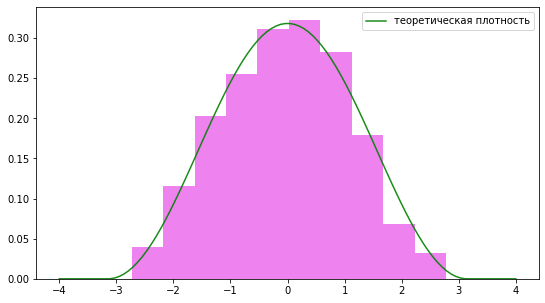

In [3]:
rcParams['figure.figsize'] = 9,5
plt.hist(sample, density=True, color='violet')
x = np.linspace(-4, 4, 100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.9, color="green")
plt.legend(loc='upper right')

In [4]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины
print(real_var)
real_mean = cosine_rv.mean() # настоящее среднее случайной величины
print(real_mean)

1.2898681336964528
0.0


In [5]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)
sample_std = sample.std() #станд отклонение
print(sample_std)

-0.03850394117647396
1.23675326289728
1.1120940890487998


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

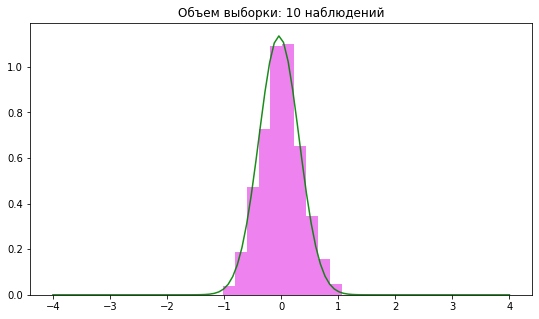

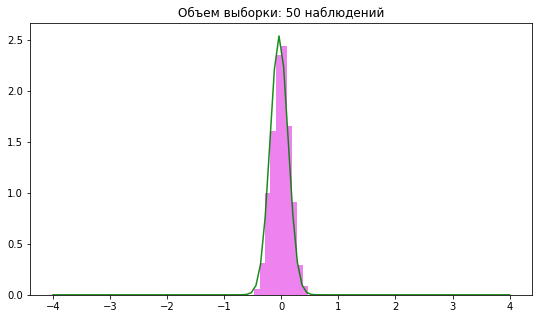

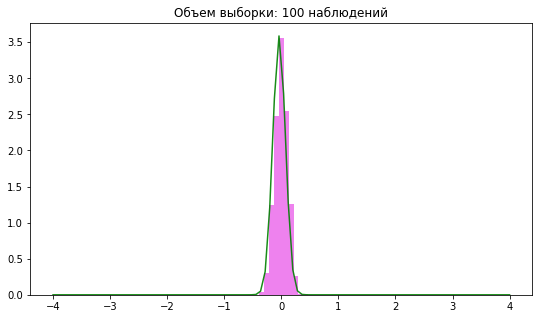

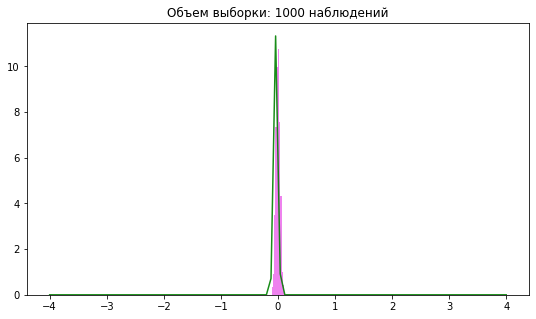

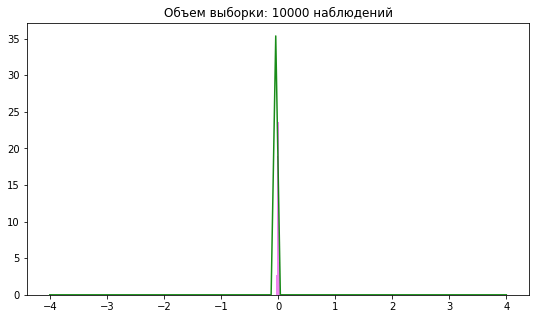

In [6]:
from numpy.linalg import norm

N_list = [10, 50, 100, 1000, 10000]
n_sample = 1000

for N in N_list:
    list = []
    for _ in range(n_sample):
        list.append(cosine_rv.rvs(N).mean())

    plt.hist(list, density=True, color='violet')
    norm_rv = sts.norm(sample_mean, scale = sample.std()/np.sqrt(N))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, alpha=0.9, color="green")
    plt.title(f'Объем выборки: {N} наблюдений')
    plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Ранее расчетным путем получили, что настоящее среднее случайной величины равно  нулю. Соответсвенно можно сделать вывод о том, что при увеличении числа наблюдений показатели наиболее точные. Апроксимация работает хорошо.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [7]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [8]:
df_new = df[['total day calls', 'churn']]
df_new

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [9]:
df_false = df_new[df_new["churn"] == False]
len_false = len(df_false)
print(len_false)
df_false.sort_values(by='total day calls')


2850


,total day calls,churn
1397,0,False
1144,30,False
1989,35,False
692,36,False
3187,40,False
...,...,...
315,158,False
2392,158,False
1057,158,False
1460,160,False


In [10]:
df_true = df_new[df_new["churn"] == True]
len_true = len(df_true)
print(len_true)
df_true.sort_values(by='total day calls')

483


,total day calls,churn
1345,0,True
1322,42,True
2884,44,True
2964,44,True
1346,45,True
...,...,...
1018,148,True
3190,151,True
580,151,True
1869,156,True


Среднее:

In [11]:
def search_mean(df):
    return df['total day calls'].mean()


In [12]:
mean_false = search_mean(df_false)
mean_false

100.28315789473685

In [13]:
mean_true = search_mean(df_true)
mean_true

101.33540372670808

Дисперсия:

In [14]:
def search_var(df):
    return df['total day calls'].var(ddof=1)

In [15]:
var_false = search_var(df_false)
var_false

392.0858166300271

In [16]:
var_true = search_var(df_true)
var_true

465.7959846395711

Стандартное отклонение:

In [17]:
def search_std(df):
    return df['total day calls'].std(ddof=1)

In [18]:
std_false = search_std(df_false)
std_false

19.801156951805293

In [19]:
std_true = search_std(df_true)
std_true

21.58230721307551

Доверительный интревал с использованием явной формулы для z интервала:

In [20]:
def search_interval(alpha, mean, std, len):
    return [mean - (norm.ppf(1-alpha/2))*(std/len**0.5), mean + (norm.ppf(1-alpha/2))*(std/len**0.5)]
   

In [24]:
search_interval(0.05, mean_false, std_false, len_false)

[99.55618833318324, 101.01012745629045]

In [25]:
search_interval(0.05, mean_true, std_true, len_true)

[99.41066229112079, 103.26014516229537]

Доверительный интервал с помощью функций `from statsmodels.stats.weightstats import _zconfint_generic`:

In [26]:
def zconfint_generi(mean_df, var_df, len_df, alpha):
    return _zconfint_generic(mean_df, (var_df/len_df)**(1/2), (1-alpha), alternative='two-sided')

In [27]:
zconfint_generi(mean_false, var_false, len_false, 0.95)

(99.55618833318324, 101.01012745629045)

In [28]:
zconfint_generi(mean_true, var_true, len_true, 0.95)

(99.41066229112079, 103.26014516229537)

Результаты идентичны

Доверительный интервал по среднедневному количеству звонков отличается несущественно между ушедшими и оставшимися клиентами.